## Importing libraries and setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# displaying graphs in notebook

%matplotlib inline

In [3]:
# creating path variable
path = r'/Users/paigepearson/Desktop/Data Analytics/Immersion Course/Achievement 6/Boat Dashboard'

In [4]:
# importing data
df_boat = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'boat_cleaned2.csv'), index_col = False)

## Cleaning Data for Analysis

#### Part 1 - Formatting the Data

In [5]:
df_boat.head()

,Unnamed: 0,Country,Currency,Price in EUR,Manufacturer,Boat Type,Condition Type,Propulsion Type,Year Built,Material,Length,Width,Number of Views Last 7 Days
0,0,Switzerland,CHF,3476,Rigiflex power boats,Motor Yacht,New Boat From Stock,NaN,2017,NaN,4.00,1.90,226
1,1,Germany,EUR,3490,Terhi power boats,Center console boat,New Boat From Stock,NaN,2020,Thermoplastic,4.00,1.50,75
2,3,Denmark,DKK,3472,Pioner power boats,Sport Boat,New Boat From Stock,NaN,2020,NaN,3.00,1.00,64
3,4,Germany,EUR,3399,Linder power boats,Fishing Boat,New Boat From Stock,NaN,2019,Aluminium,3.55,1.46,58
4,6,Switzerland,CHF,3750,NaN,Catamaran,Used Boat,Unleaded,1999,Aluminium,6.20,2.38,474


In [6]:
# removing Unnamed column that sometimes pops up
df_boat = df_boat.drop(columns = 'Unnamed: 0')

In [7]:
# checking work
df_boat.head()

,Country,Currency,Price in EUR,Manufacturer,Boat Type,Condition Type,Propulsion Type,Year Built,Material,Length,Width,Number of Views Last 7 Days
0,Switzerland,CHF,3476,Rigiflex power boats,Motor Yacht,New Boat From Stock,NaN,2017,NaN,4.00,1.90,226
1,Germany,EUR,3490,Terhi power boats,Center console boat,New Boat From Stock,NaN,2020,Thermoplastic,4.00,1.50,75
2,Denmark,DKK,3472,Pioner power boats,Sport Boat,New Boat From Stock,NaN,2020,NaN,3.00,1.00,64
3,Germany,EUR,3399,Linder power boats,Fishing Boat,New Boat From Stock,NaN,2019,Aluminium,3.55,1.46,58
4,Switzerland,CHF,3750,NaN,Catamaran,Used Boat,Unleaded,1999,Aluminium,6.20,2.38,474


In [8]:
# creating a subset with only numerical variables, not including Price

sub_boat = df_boat[['Price in EUR', 'Year Built', 'Length', 'Width', 'Number of Views Last 7 Days']]

In [9]:
# checking work
sub_boat.head()

,Price in EUR,Year Built,Length,Width,Number of Views Last 7 Days
0,3476,2017,4.00,1.90,226
1,3490,2020,4.00,1.50,75
2,3472,2020,3.00,1.00,64
3,3399,2019,3.55,1.46,58
4,3750,1999,6.20,2.38,474


#### Part 2 - Standardizing the Data

In [10]:
# recording summary statistics before standardization of the subset
sub_boat.describe()

,Price in EUR,Year Built,Length,Width,Number of Views Last 7 Days
count,9.234000e+03,9234.000000,9234.000000,9234.000000,9234.000000
mean,3.021898e+05,2004.933398,11.719805,3.553119,150.149339
std,9.385018e+05,16.391599,5.998561,1.212155,154.596330
min,3.300000e+03,1885.000000,1.040000,0.010000,13.000000
25%,4.490000e+04,1999.000000,7.560000,2.550000,70.000000
50%,9.585100e+04,2008.000000,10.500000,3.390000,108.000000
75%,2.498308e+05,2018.000000,14.000000,4.260000,172.000000
max,3.100000e+07,2021.000000,100.000000,25.160000,3263.000000


<Axes: xlabel='Price in EUR', ylabel='Count'>

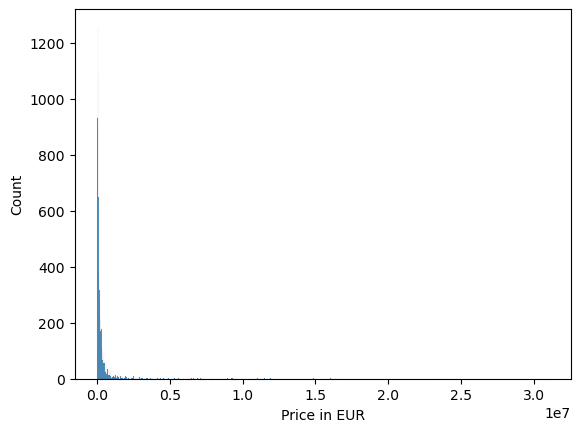

In [11]:
# creating charts to log the before and after of the standardization
sns.histplot(sub_boat['Price in EUR'])

<Axes: xlabel='Year Built', ylabel='Count'>

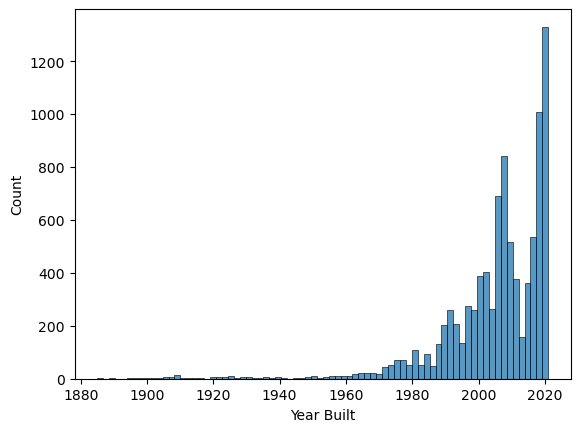

In [12]:
sns.histplot(sub_boat['Year Built'])

<Axes: xlabel='Length', ylabel='Count'>

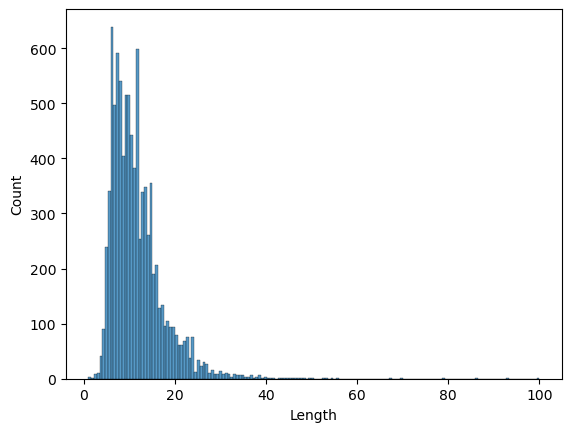

In [13]:
sns.histplot(sub_boat['Length'])

<Axes: xlabel='Width', ylabel='Count'>

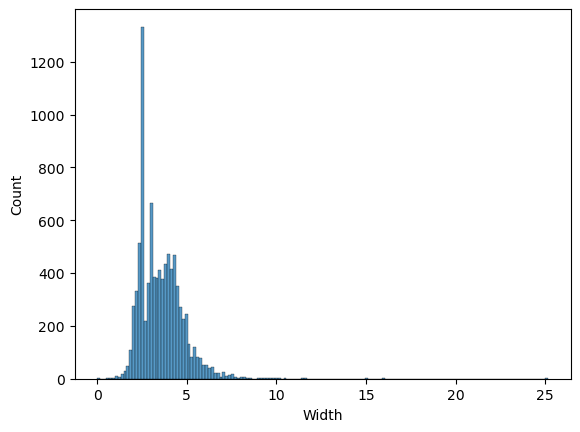

In [14]:
sns.histplot(sub_boat['Width'])

<Axes: xlabel='Number of Views Last 7 Days', ylabel='Count'>

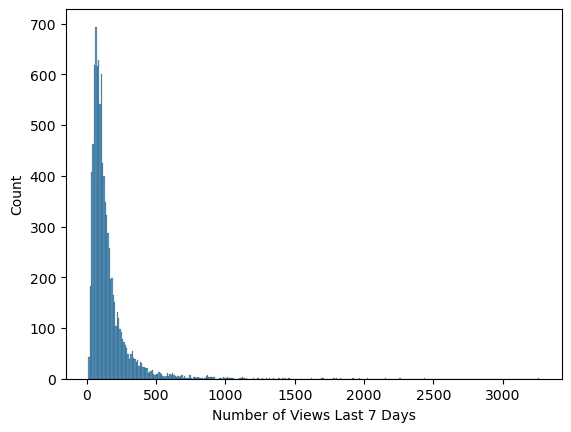

In [15]:
sns.histplot(sub_boat['Number of Views Last 7 Days'])

In [16]:
# creating coby of subset to standardize

scaled_sub_boat = sub_boat.copy()

In [17]:
# applying formula to standardize subset
for col in ['Price in EUR', 'Year Built', 'Length', 'Width', 'Number of Views Last 7 Days']:
    scaled_sub_boat[col] = (scaled_sub_boat[col] - scaled_sub_boat[col].mean()) / scaled_sub_boat[col].std()

In [18]:
# checking work
scaled_sub_boat.describe()

,Price in EUR,Year Built,Length,Width,Number of Views Last 7 Days
count,9.234000e+03,9.234000e+03,9.234000e+03,9.234000e+03,9.234000e+03
mean,-3.693529e-17,5.601853e-15,2.462353e-17,-1.354294e-16,-2.462353e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.184755e-01,-7.316760e+00,-1.780395e+00,-2.922992e+00,-8.871449e-01
25%,-2.741495e-01,-3.619780e-01,-6.934672e-01,-8.275501e-01,-5.184427e-01
50%,-2.198598e-01,1.870837e-01,-2.033496e-01,-1.345694e-01,-2.726413e-01
75%,-5.579003e-02,7.971524e-01,3.801237e-01,5.831607e-01,1.413401e-01
max,3.270938e+01,9.801730e-01,1.471690e+01,1.782518e+01,2.013535e+01


<Axes: xlabel='Price in EUR', ylabel='Count'>

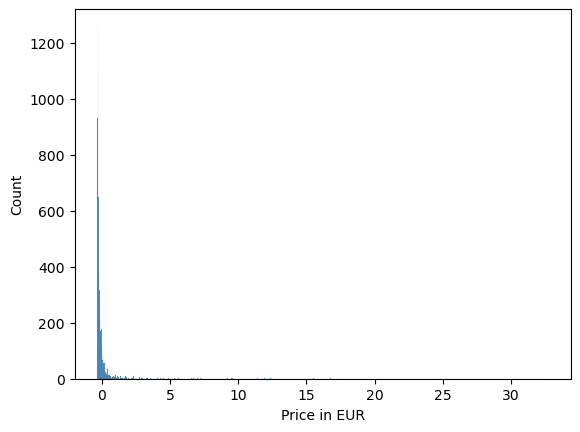

In [19]:
sns.histplot(scaled_sub_boat['Price in EUR'])

<Axes: xlabel='Year Built', ylabel='Count'>

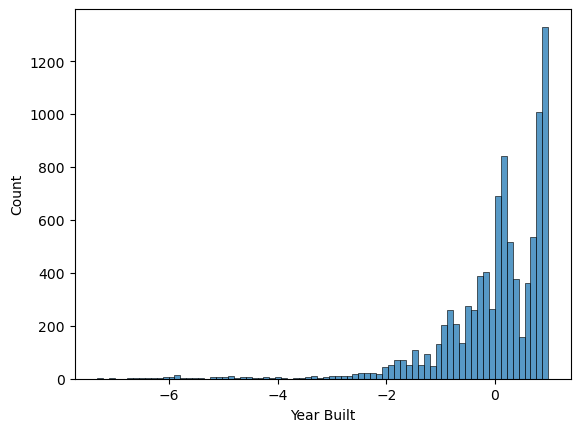

In [20]:
sns.histplot(scaled_sub_boat['Year Built'])

<Axes: xlabel='Length', ylabel='Count'>

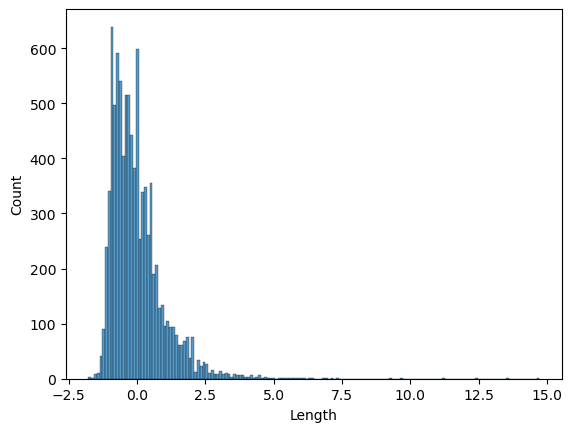

In [21]:
sns.histplot(scaled_sub_boat['Length'])

<Axes: xlabel='Width', ylabel='Count'>

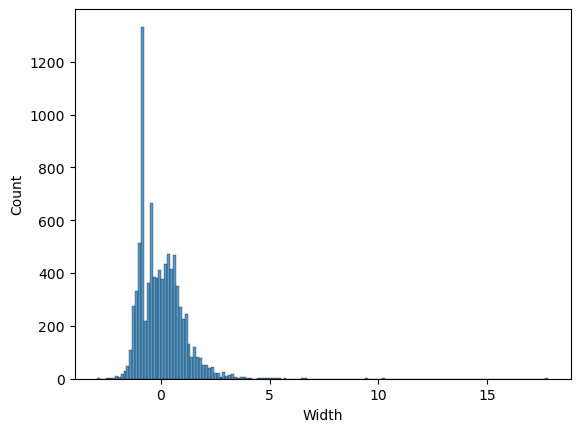

In [22]:
sns.histplot(scaled_sub_boat['Width'])

<Axes: xlabel='Number of Views Last 7 Days', ylabel='Count'>

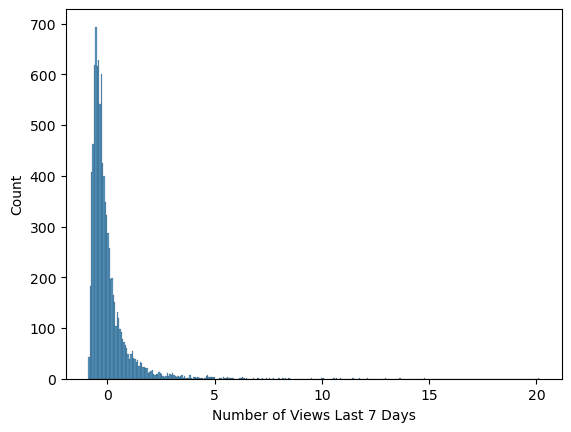

In [23]:
sns.histplot(scaled_sub_boat['Number of Views Last 7 Days'])

Note: Negative numbers are outside of the realm of possibility with all these categories, so I believe standardization is either not needed or not suitable for this dataset. Even though there is a large range in say price, it is not out of the realms of possibility as mega yachts and luxury boats can be well into the millions.

### The Elbow Technique

In [24]:
# defining the range of potential number of clusters in data, then defining the k-means clusters within this range

num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [25]:
# creating a score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(sub_boat).score(sub_boat) for i in range(len(kmeans))]
score

/Users/paigepearson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/paigepearson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/paigepearson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/paigepearson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

[-8132294567885301.0,
 -3343295508782982.0,
 -1940950939782901.8,
 -1091335032331257.4,
 -746978098562433.8,
 -508548494309140.4,
 -367316966696317.25,
 -271681569232389.62,
 -208397833899739.2]

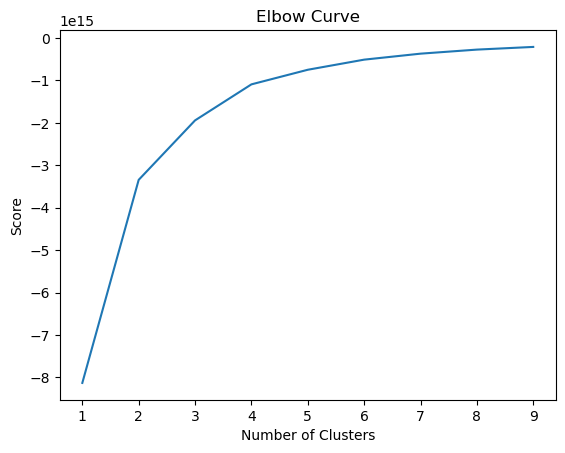

In [26]:
# plotting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Note: It looks as though 4 may be the number of clusters, although I can see a slight bump at 5 and 6, so I will keep this in mind going forward. The bumps on 5 and 6 are likely too small to be counted.

### k-means Clustering

In [27]:
# creating the k-means object

kmeans = KMeans(n_clusters = 4) 

In [28]:
# Fit the k-means object to the data.

kmeans.fit(sub_boat)

/Users/paigepearson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [29]:
sub_boat['clusters'] = kmeans.fit_predict(sub_boat)

/Users/paigepearson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/vr/dtw_gx814dz__p2jnh_scllw0000gn/T/ipykernel_24646/1186509440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_boat['clusters'] = kmeans.fit_predict(sub_boat)


In [30]:
sub_boat.head()

,Price in EUR,Year Built,Length,Width,Number of Views Last 7 Days,clusters
0,3476,2017,4.00,1.90,226,0
1,3490,2020,4.00,1.50,75,0
2,3472,2020,3.00,1.00,64,0
3,3399,2019,3.55,1.46,58,0
4,3750,1999,6.20,2.38,474,0


In [31]:
sub_boat['clusters'].value_counts()

clusters
0    8780
3     382
1      64
2       8
Name: count, dtype: int64

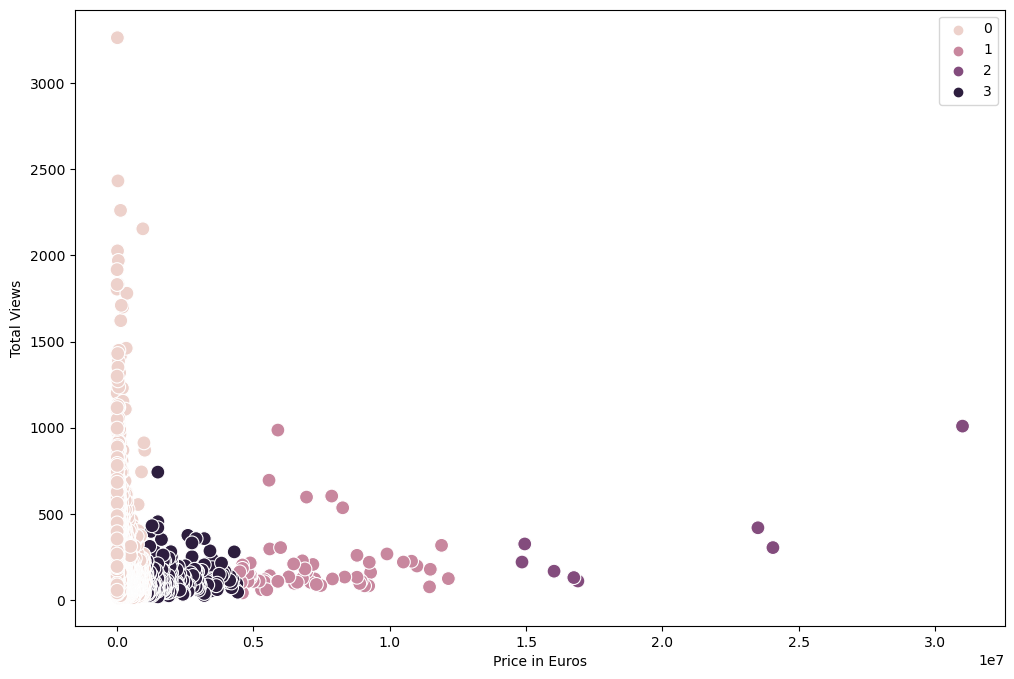

In [32]:
# plotting the clusters for 'Price in EUR' and 'Number of Views Last 7 Days'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_boat['Price in EUR'], y=sub_boat['Number of Views Last 7 Days'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Price in Euros') 
plt.ylabel('Total Views') 
plt.show()

Note: I think having 4 groups was the right amount. This chart helps understand the clusters.

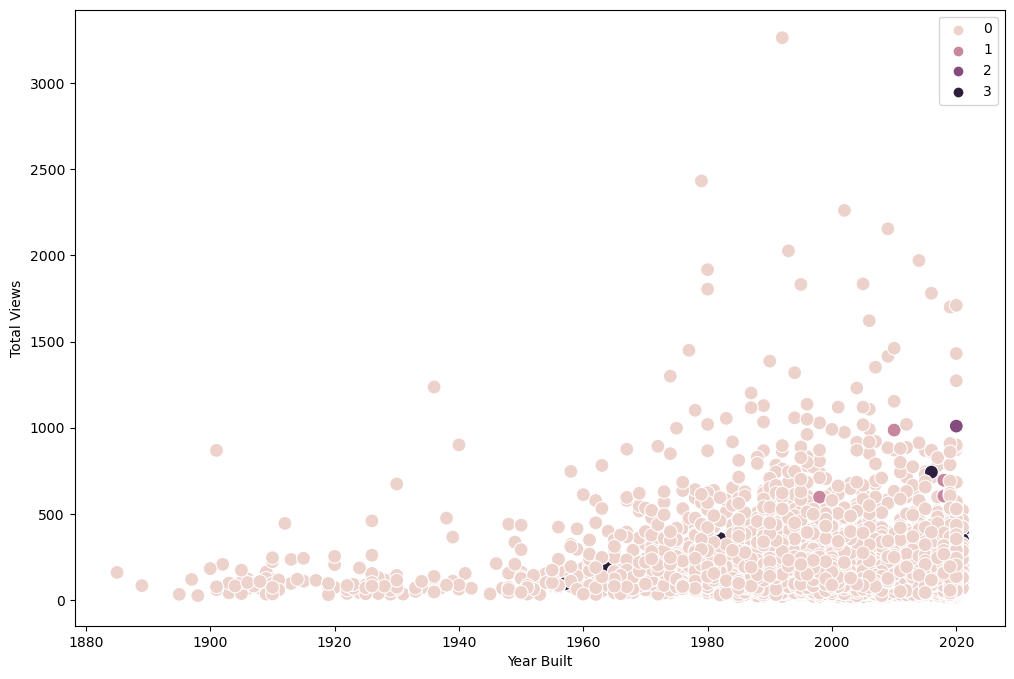

In [33]:
# plotting the clusters for 'Year Built' and 'Number of Views Last 7 Days'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_boat['Year Built'], y=sub_boat['Number of Views Last 7 Days'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year Built') 
plt.ylabel('Total Views') 
plt.show()

Note: This chart shows how cluster 0 is dominating all other clusters, and is by count the largest cluster.

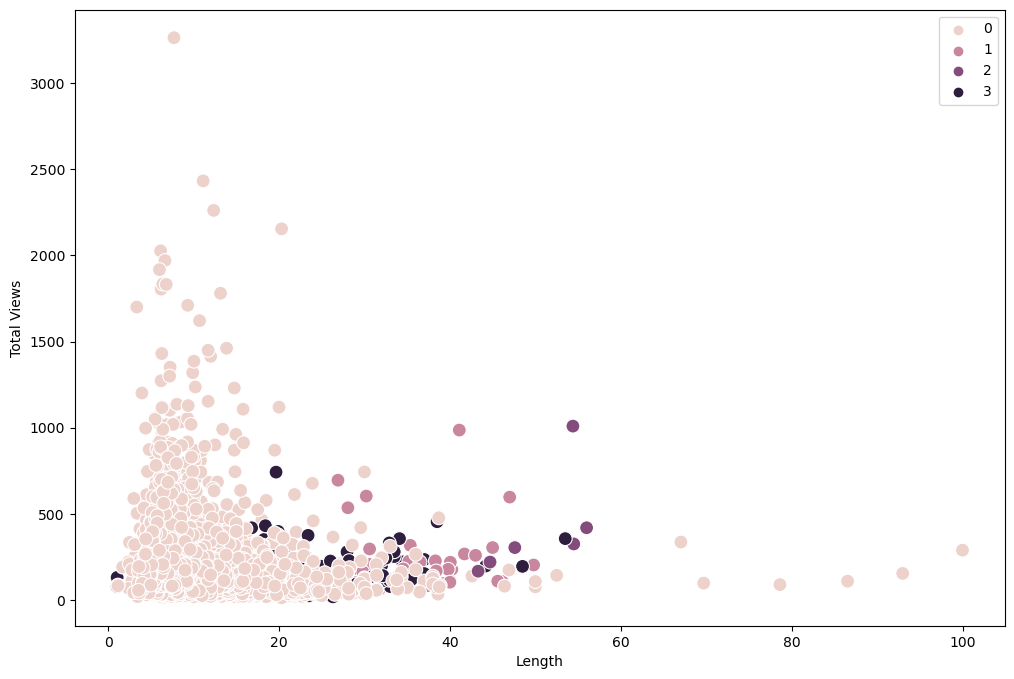

In [34]:
# plotting the clusters for 'Length' and 'Number of Views Last 7 Days'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_boat['Length'], y=sub_boat['Number of Views Last 7 Days'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Length') 
plt.ylabel('Total Views') 
plt.show()

Note: This chart also has cluster 0 covering over the other clusters, making it very hard to see any sort of pattern clearly.

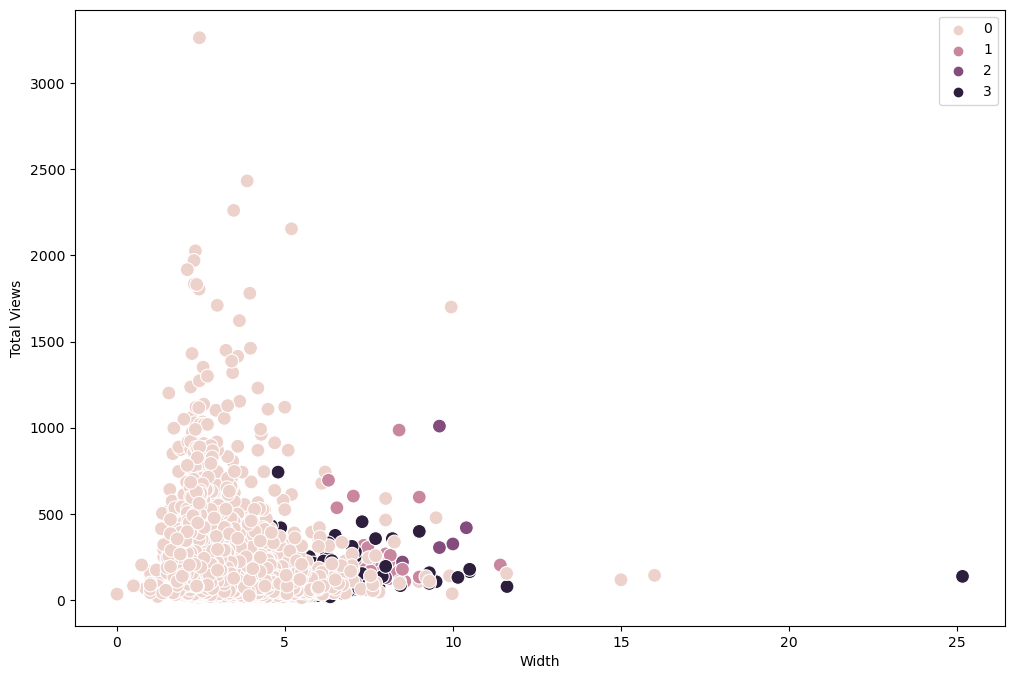

In [35]:
# plotting the clusters for 'Width' and 'Number of Views Last 7 Days'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_boat['Width'], y=sub_boat['Number of Views Last 7 Days'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Width') 
plt.ylabel('Total Views') 
plt.show()

In [36]:
sub_boat.loc[sub_boat['clusters'] == 3, 'cluster'] = 'violet'
sub_boat.loc[sub_boat['clusters'] == 2, 'cluster'] = 'dark purple'
sub_boat.loc[sub_boat['clusters'] == 1, 'cluster'] = 'purple'
sub_boat.loc[sub_boat['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/vr/dtw_gx814dz__p2jnh_scllw0000gn/T/ipykernel_24646/1057810243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_boat.loc[sub_boat['clusters'] == 3, 'cluster'] = 'violet'


In [37]:
sub_boat.groupby('cluster').agg({'Price in EUR':['mean', 'median'], 
                         'Year Built':['mean', 'median'], 
                         'Length':['mean', 'median'],
                         'Width':['mean', 'median'],
                         'Number of Views Last 7 Days':['mean', 'median']})

Price in EUR               Year Built             Length          \
                     mean      median         mean  median       mean  median   
cluster                                                                         
dark purple  1.975312e+07  16825000.0  2014.375000  2020.0  47.100000  46.150   
pink         1.659923e+05     89000.0  2004.531663  2007.0  11.045995  10.100   
purple       7.001941e+06   6554597.5  2013.890625  2016.0  33.556250  31.725   
violet       1.902773e+06   1650000.0  2012.468586  2013.0  22.807435  22.325   

                Width        Number of Views Last 7 Days         
                 mean median                        mean median  
cluster                                                          
dark purple  9.225000  9.550                  335.500000  262.0  
pink         3.420387  3.300                  151.482916  108.0  
purple       7.356250  7.305                  188.421875  133.5  
violet       5.847906  5.600                  109.204188   90.5

### Radar Chart

In [38]:
# checking df
sub_boat.head()

,Price in EUR,Year Built,Length,Width,Number of Views Last 7 Days,clusters,cluster
0,3476,2017,4.00,1.90,226,0,pink
1,3490,2020,4.00,1.50,75,0,pink
2,3472,2020,3.00,1.00,64,0,pink
3,3399,2019,3.55,1.46,58,0,pink
4,3750,1999,6.20,2.38,474,0,pink


In [39]:
# creating a copy df
mini_boat = sub_boat.copy()

In [40]:
# dropping categorical columns and old clusters to redo them with properly scaled data
mini_boat = mini_boat.drop(['Year Built', 'cluster'], axis=1)

In [41]:
# checking work
mini_boat.head()

,Price in EUR,Length,Width,Number of Views Last 7 Days,clusters
0,3476,4.00,1.90,226,0
1,3490,4.00,1.50,75,0
2,3472,3.00,1.00,64,0
3,3399,3.55,1.46,58,0
4,3750,6.20,2.38,474,0


/Users/paigepearson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


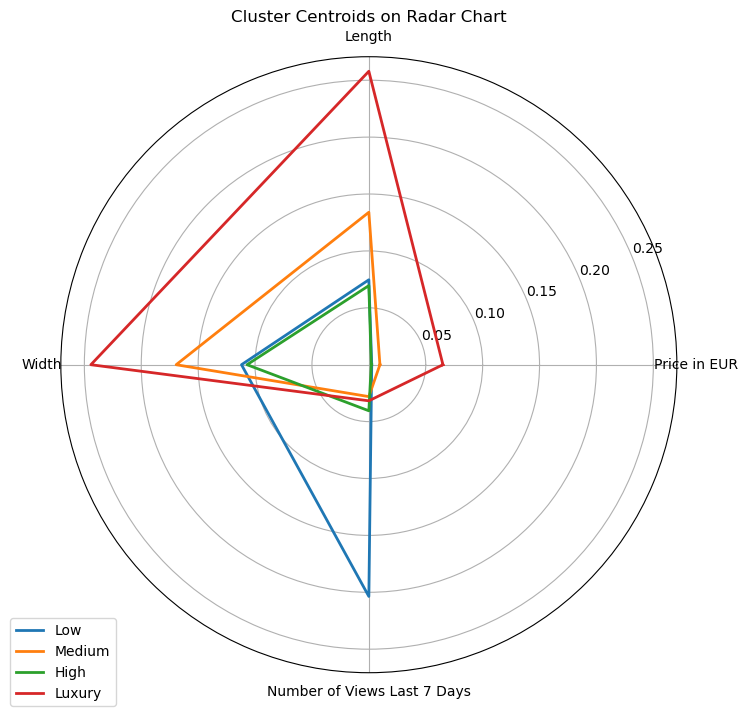

In [44]:
# Create a dictionary to map cluster numbers to labels
cluster_labels = {
    0: 'Low',
    1: 'Medium',
    2: 'High',
    3: 'Luxury'
}

# Apply KMeans clustering on the normalized data
kmeans = KMeans(n_clusters=k, random_state=42)
mini_boat_scaled_df['clusters'] = kmeans.fit_predict(mini_boat_scaled_df)

# Compute the centroids for each cluster on the normalized data
centroid_df = mini_boat_scaled_df.groupby('clusters').mean().reset_index()

# Determine the number of variables
num_vars = centroid_df.shape[1] - 1

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Ensure the plot is circular by appending the start to the end

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each cluster centroid
for idx, row in centroid_df.iterrows():
    data = row.drop('clusters').tolist()
    data += data[:1]  # Ensure the plot is circular by appending the start to the end
    cluster_label = cluster_labels.get(int(row['clusters']), f'Cluster {int(row["clusters"])}')
    ax.plot(angles, data, linewidth=2, linestyle='solid', label=cluster_label)

# Define feature names
features = list(centroid_df.drop('clusters', axis=1).columns)
plt.xticks(angles[:-1], features)

# Add legend and title
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Cluster Centroids on Radar Chart')

# Show the plot
plt.show()

/Users/paigepearson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


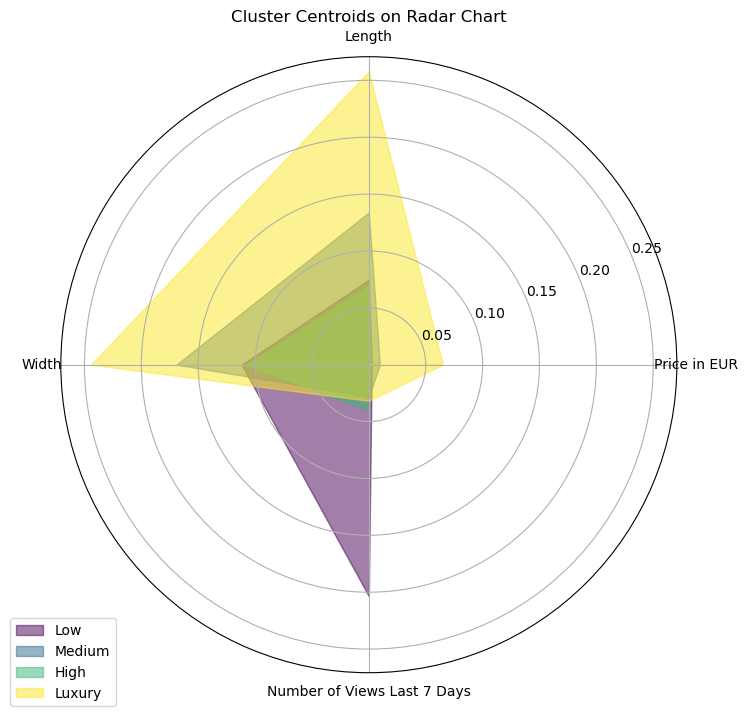

In [46]:

# Create a dictionary to map cluster numbers to labels
cluster_labels = {
    0: 'Low',
    1: 'Medium',
    2: 'High',
    3: 'Luxury'
}

# Apply KMeans clustering on the normalized data
kmeans = KMeans(n_clusters=k, random_state=42)
mini_boat_scaled_df['clusters'] = kmeans.fit_predict(mini_boat_scaled_df)

# Compute the centroids for each cluster on the normalized data
centroid_df = mini_boat_scaled_df.groupby('clusters').mean().reset_index()

# Determine the number of variables
num_vars = centroid_df.shape[1] - 1

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Ensure the plot is circular by appending the start to the end

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each cluster centroid as filled polygons
for idx, row in centroid_df.iterrows():
    data = row.drop('clusters').tolist()
    data += data[:1]  # Ensure the plot is circular by appending the start to the end

    # Specify color and alpha (transparency) parameters
    color = plt.cm.viridis(idx / (k - 1))  # Use a colormap for varying colors
    alpha = 0.5  # You can change this to your desired transparency level

    cluster_label = cluster_labels.get(int(row['clusters']), f'Cluster {int(row["clusters"])}')
    ax.fill_between(angles, 0, data, color=color, alpha=alpha, label=cluster_label)

# Define feature names
features = list(centroid_df.drop('clusters', axis=1).columns)
plt.xticks(angles[:-1], features)

# Add legend and title
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Cluster Centroids on Radar Chart')

# Show the plot
plt.show()


In [55]:
# creating copy of sub_boat
reg_boat = sub_boat.copy()

In [56]:
# dropping cluster/clusters column
reg_boat = reg_boat.drop(['cluster', 'clusters'], axis=1)

In [57]:
# checking work
reg_boat.head()

,Price in EUR,Year Built,Length,Width,Number of Views Last 7 Days
0,3476,2017,4.00,1.90,226
1,3490,2020,4.00,1.50,75
2,3472,2020,3.00,1.00,64
3,3399,2019,3.55,1.46,58
4,3750,1999,6.20,2.38,474


In [58]:
# checking reg_boat through regression 

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Predictor variables without 'Price in EUR'
X = reg_boat[['Year Built', 'Length', 'Width']]  

# Log transformation for price
X['Log_Price'] = np.log(reg_boat['Price in EUR'] + 1)  # Adding 1 to avoid log(0)

# Response variable
y = reg_boat['Number of Views Last 7 Days']

# Instantiate the StandardScaler
scaler = MinMaxScaler()

# Scale the data
scaled_X = scaler.fit_transform(X)

# Convert scaled_X back to a pandas DataFrame and add column names
scaled_X_df = pd.DataFrame(scaled_X, columns=X.columns)

# Add constant to the scaled data
X_with_constant = sm.add_constant(scaled_X_df)

# Fit the OLS model
model = sm.OLS(y, X_with_constant).fit()

# Check for multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = scaled_X_df.columns
vif_data["VIF"] = [variance_inflation_factor(scaled_X_df.values, i) for i in range(len(scaled_X_df.columns))]

print(vif_data)
print(model.summary())

      feature        VIF
0  Year Built  12.955350
1      Length  20.429051
2       Width  42.306658
3   Log_Price  27.368299
                                 OLS Regression Results                                
Dep. Variable:     Number of Views Last 7 Days   R-squared:                       0.053
Model:                                     OLS   Adj. R-squared:                  0.052
Method:                          Least Squares   F-statistic:                     128.6
Date:                         Thu, 23 Nov 2023   Prob (F-statistic):          4.85e-107
Time:                                 11:45:37   Log-Likelihood:                -59398.
No. Observations:                         9234   AIC:                         1.188e+05
Df Residuals:                             9229   BIC:                         1.188e+05
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                     

/var/folders/vr/dtw_gx814dz__p2jnh_scllw0000gn/T/ipykernel_23859/2593319078.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Log_Price'] = np.log(reg_boat['Price in EUR'] + 1)  # Adding 1 to avoid log(0)


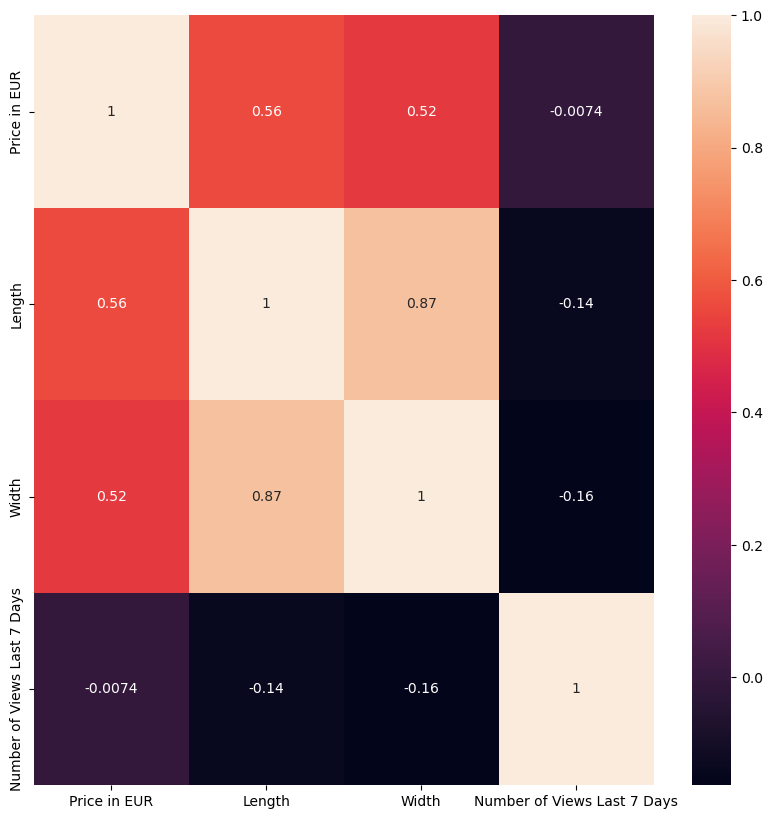

In [59]:
# creating a correlation matrix heatmap using seaborn

# creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# creating the correlation heatmap in seaborn 
corr = sns.heatmap(reg_boat.drop('Year Built', axis=1).corr(), annot = True) 

In [61]:
# exporting sub_boat
sub_boat.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'clusters.csv'))

### Conclusion

At first, the four clusters show up clearly in the chart comparing views and price. This changes as the other charts are made and it becomes apparent that cluster 0 overshadows the other clusters, making them difficult to see in the scatterplots. 

In the next steps of my analysis, it will be really interesting to look at each cluster on it's own and see if there are any characteristics that will bring further insights. Cluster 0 is so large that singling this out on it's own and then looking at it could help bring understanding as to what may drive online traffic to this boat sales site. Since the final project will be to create a dashboard in Tableau, creating these clusters in advance helps to organize the data and make it easier to manipulate.